### Codio Activity 16.4: Using Scikit-learn's Kernel Functions

**Expected Time = 30 minutes**

**Total Points = 30**

Similar to the previous assignment, kernelized `LogisticRegression` can be performed with functions from scikit-learn.  In this activity, you will use the `polynomial_kernel` and `rbf` kernel functions to transform the data and use the transformed data in a `LogisticRegression` estimator.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel


### A Regression Example

Below, a small synthetic quadratic dataset is created.  Using the `x` variable, a quadratic polynomial kernel is used to transform the data as `ktrain`.  Then, a `LinearRegression` estimator is fit on the transformed data.  The results of the model are visualized following the model fit.

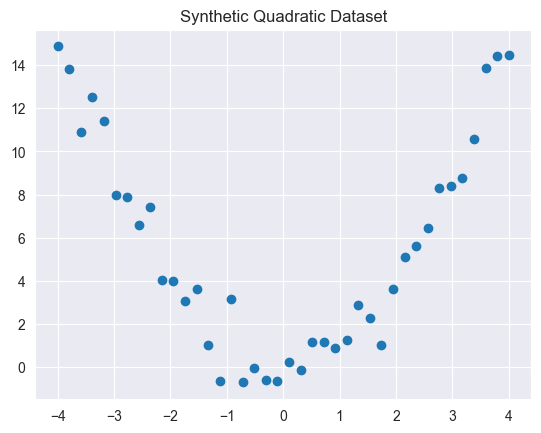

In [19]:
x = np.linspace(-4, 4, 40)

def quad_x(x): 
    return x**2 + np.random.normal(size = len(x))

plt.scatter(x, quad_x(x))
plt.title('Synthetic Quadratic Dataset');

In [20]:
#polynomial kernel
ktrain = polynomial_kernel(x.reshape(-1, 1), x.reshape(-1, 1), degree = 2)

#fit regressor on kernel data
lr = LinearRegression().fit(ktrain, quad_x(x))

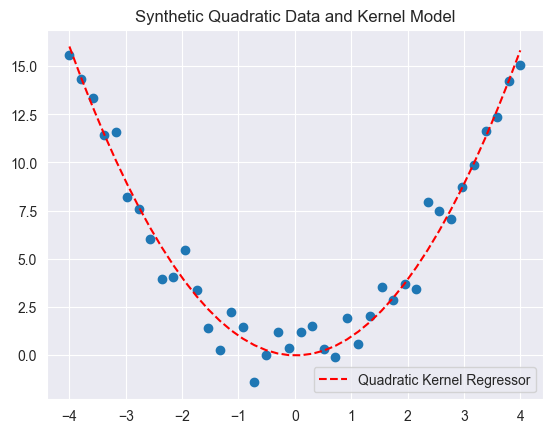

In [21]:
#visualize the predictions
plt.plot(x, lr.predict(ktrain), '--r', label = 'Quadratic Kernel Regressor')
plt.scatter(x, quad_x(x))
plt.title('Synthetic Quadratic Data and Kernel Model')
plt.legend();

#### Loading the Wine Data

The wine data is loaded and the `X`, `y` variables created to use in applying the kernels for classification models below.

In [22]:
X, y = load_wine(return_X_y=True, as_frame=True)
X, y = X[['total_phenols', 'color_intensity']].values, y

[Back to top](#-Index)

### Problem 1

#### Logistic Regression with Linear Kernel

**10 Points**

Below, build a transformed version of the data under a first degree polynomial kernel.  Assign the transformed data as `ktrain` below. Use the transformed data to build a `LogisticRegression` estimator with `max_iter = 1000` named `linear_logistic`, and examine the accuracy score of the estimator.  

HINT: although the example above reshapes the data, there is no need to reshape the data in this execise.

In [23]:
### GRADED
ktrain = ''
linear_logistic = ''

# YOUR CODE HERE
ktrain = polynomial_kernel(X, X, degree = 1)
linear_logistic = LogisticRegression(max_iter = 1000).fit(ktrain, y)

### ANSWER CHECK
print(linear_logistic.score(ktrain, y))

0.8820224719101124


[Back to top](#-Index)

### Problem 2

#### Logistic Regression with Cubic Kernel

**10 Points**

Below, build a transformed version of the data under a third degree polynomial kernel. Assign the transformed data as `ktrain_cubic` below. Use the transformed data to build a `LogisticRegression` estimator with `max_iter = 1000` named `cubic_logistic`, and examine the accuracy score of the estimator.

In [24]:
### GRADED
ktrain_cubic = ''
cubic_logistic = ''

# YOUR CODE HERE
ktrain_cubic = polynomial_kernel(X, X, degree = 3)
cubic_logistic = LogisticRegression(max_iter = 1000).fit(ktrain_cubic, y)

### ANSWER CHECK
print(cubic_logistic.score(ktrain_cubic, y))

0.9157303370786517


[Back to top](#-Index)

### Problem 3

#### Logistic Regression with Gaussian Kernel

**10 Points**

Below, build a transformed version of the data under a gaussian kernel -- `rbf_kernel`. Assign the transformed data as `ktrain_rbf` below. Use the transformed data to build a `LogisticRegression` estimator named `rbf_logistic`, and examine the accuracy score of the estimator.

In [25]:
### GRADED
ktrain_rbf = ''
rbf_logistic = ''

# YOUR CODE HERE
ktrain_rbf = rbf_kernel(X, X)
rbf_logistic = LogisticRegression().fit(ktrain_rbf, y)

### ANSWER CHECK
print(rbf_logistic.score(ktrain_rbf, y))

0.9101123595505618
